# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load dataset
data = pd.read_csv('202008-baywheels-tripdata.csv')
data.shape

(152446, 13)

### Dataset Describtion

In [3]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             152446 non-null  object 
 1   rideable_type       152446 non-null  object 
 2   started_at          152446 non-null  object 
 3   ended_at            152446 non-null  object 
 4   start_station_name  104206 non-null  object 
 5   start_station_id    104206 non-null  float64
 6   end_station_name    101349 non-null  object 
 7   end_station_id      101349 non-null  float64
 8   start_lat           152446 non-null  float64
 9   start_lng           152446 non-null  float64
 10  end_lat             152246 non-null  float64
 11  end_lng             152246 non-null  float64
 12  member_casual       152446 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.1+ MB


In [5]:
data.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,104206.000000,101349.000000,152446.000000,152446.000000,152246.000000,152246.000000
mean,224.407261,220.555881,37.729328,-122.355459,37.729155,-122.350376
std,173.466608,174.087160,0.142196,0.171591,0.172028,0.681279
min,3.000000,3.000000,37.240000,-122.510000,0.000000,-122.510000
25%,72.000000,72.000000,37.760000,-122.433280,37.760000,-122.432642
50%,145.000000,139.000000,37.773571,-122.413371,37.773556,-122.413200
75%,386.000000,384.000000,37.787883,-122.392553,37.788160,-122.392673
max,538.000000,538.000000,37.880222,-121.770000,37.880222,0.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    48240
start_station_id      48240
end_station_name      51097
end_station_id        51097
start_lat                 0
start_lng                 0
end_lat                 200
end_lng                 200
member_casual             0
dtype: int64

In [29]:
#make copy from dataset
data_clean = data.copy()

In [30]:
#conver date from object to date type
data_clean.started_at = pd.to_datetime(data_clean.started_at)
data_clean.ended_at = pd.to_datetime(data_clean.ended_at)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             152446 non-null  object        
 1   rideable_type       152446 non-null  object        
 2   started_at          152446 non-null  datetime64[ns]
 3   ended_at            152446 non-null  datetime64[ns]
 4   start_station_name  104206 non-null  object        
 5   start_station_id    104206 non-null  float64       
 6   end_station_name    101349 non-null  object        
 7   end_station_id      101349 non-null  float64       
 8   start_lat           152446 non-null  float64       
 9   start_lng           152446 non-null  float64       
 10  end_lat             152246 non-null  float64       
 11  end_lng             152246 non-null  float64       
 12  member_casual       152446 non-null  object        
dtypes: datetime64[ns](2), float64

In [10]:
# extract start time month name
data_clean['start_time_month_name']=data_clean['started_at'].dt.strftime('%B')
# extract start time month number
data_clean['start_time_month']=data_clean['started_at'].dt.month.astype(int)
# extract start time weekdays
data_clean['start_time_weekday']=data_clean['started_at'].dt.strftime('%a')
# extract start time day
data_clean['start_time_day']=data_clean['started_at'].dt.day.astype(int)
# extract start time hour
data_clean['start_time_hour']=data_clean['started_at'].dt.hour
# extract start time minute
data_clean['start_time_minute']=data_clean['started_at'].dt.minute

data_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour,start_time_minute
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual,August,8,Fri,14,9,41
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual,August,8,Thu,13,18,43
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual,August,8,Fri,14,9,13
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual,August,8,Fri,14,11,26
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual,August,8,Fri,14,8,37


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152446 entries, 0 to 152445
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ride_id                152446 non-null  object        
 1   rideable_type          152446 non-null  object        
 2   started_at             152446 non-null  datetime64[ns]
 3   ended_at               152446 non-null  datetime64[ns]
 4   start_station_name     104206 non-null  object        
 5   start_station_id       104206 non-null  float64       
 6   end_station_name       101349 non-null  object        
 7   end_station_id         101349 non-null  float64       
 8   start_lat              152446 non-null  float64       
 9   start_lng              152446 non-null  float64       
 10  end_lat                152246 non-null  float64       
 11  end_lng                152246 non-null  float64       
 12  member_casual          152446 non-null  obje

In [12]:
data_clean['duration'] = data_clean['ended_at'] - data_clean['started_at']
data_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour,start_time_minute,duration
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual,August,8,Fri,14,9,41,00:22:42
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual,August,8,Thu,13,18,43,00:09:52
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual,August,8,Fri,14,9,13,00:06:35
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual,August,8,Fri,14,11,26,00:02:23
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual,August,8,Fri,14,8,37,00:14:43


In [31]:
#Add colum of durations of trips
data_clean['Duration_minuts'] = data_clean['ended_at'].dt.minute - data_clean['started_at'].dt.minute
data_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Duration_minuts
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,37.760320,-122.387456,casual,-38
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,37.751798,-122.426539,casual,9
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,37.764950,-122.398857,casual,7
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,37.771924,-122.433821,casual,3
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,37.770000,-122.490000,casual,15


In [14]:
data_clean.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,start_time_month,start_time_day,start_time_hour,start_time_minute,duration,Duration_minuts
count,104206.000000,101349.000000,152446.000000,152446.000000,152246.000000,152246.000000,152446.0,152446.000000,152446.000000,152446.000000,152446,152446.000000
mean,224.407261,220.555881,37.729328,-122.355459,37.729155,-122.350376,8.0,15.686086,14.367514,29.493781,0 days 00:25:50.566069,0.179624
std,173.466608,174.087160,0.142196,0.171591,0.172028,0.681279,0.0,8.872555,4.522060,17.257190,0 days 05:38:08.446353,23.236633
min,3.000000,3.000000,37.240000,-122.510000,0.000000,-122.510000,8.0,1.000000,0.000000,0.000000,-1 days +23:54:13,-59.000000
25%,72.000000,72.000000,37.760000,-122.433280,37.760000,-122.432642,8.0,8.000000,11.000000,14.000000,0 days 00:07:09,-2.000000
50%,145.000000,139.000000,37.773571,-122.413371,37.773556,-122.413200,8.0,15.000000,15.000000,30.000000,0 days 00:12:34,7.000000
75%,386.000000,384.000000,37.787883,-122.392553,37.788160,-122.392673,8.0,23.000000,18.000000,44.000000,0 days 00:21:48,14.000000
max,538.000000,538.000000,37.880222,-121.770000,37.880222,0.000000,8.0,31.000000,23.000000,59.000000,30 days 20:36:39,59.000000


In [15]:
data_clean.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

### What is the structure of your dataset?

 there are 152446 bike rides in San Francisco, the data set contains features of:
* 1- ride id
*2- bike type
*3- duration of trip
*4- station(start-end)
*5- Station Latitude(start-end)
*6- Station Longitude(start-end)

### What is/are the main feature(s) of interest in your dataset?

> In this data set i'm interested in trip duration and  and the type of bikes most used and the type of customer.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the started_at will be most one help in my investigation.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
data_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour,start_time_minute,duration,Duration_minuts
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,...,-122.387456,casual,August,8,Fri,14,9,41,00:22:42,-38
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,...,-122.426539,casual,August,8,Thu,13,18,43,00:09:52,9
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,...,-122.398857,casual,August,8,Fri,14,9,13,00:06:35,7
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,...,-122.433821,casual,August,8,Fri,14,11,26,00:02:23,3
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,...,-122.490000,casual,August,8,Fri,14,8,37,00:14:43,15


In [25]:
def count_plot(data , x ,x_label, y_label,title):
    base_color = sb.color_palette()[0]
    plt.figure(figsize=[10,5])
    sb.countplot(data=data , x=x ,color=base_color);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(title);

##### the first qustion here what is the days the system most used in ?

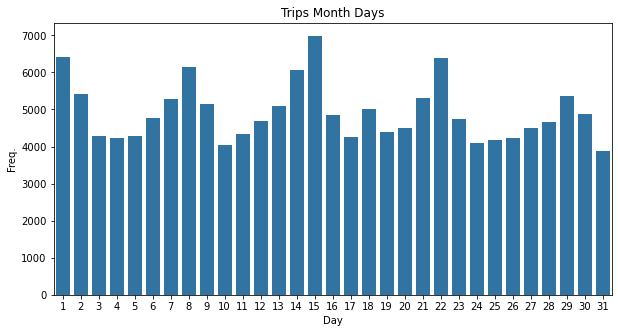

In [18]:
count_plot(data_clean,'start_time_day','Day','Freq.', 'Trips Month Days' )

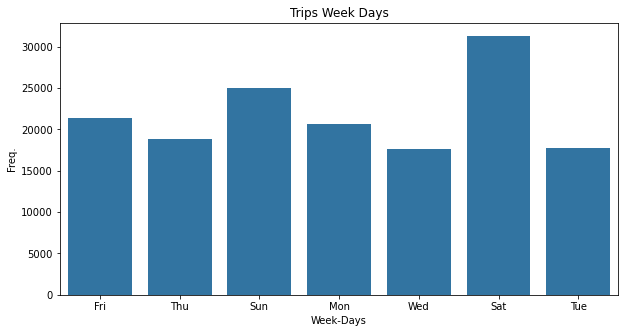

In [19]:
count_plot(data_clean, 'start_time_weekday', 'Week-Days', 'Freq.', 'Trips Week Days' )

* The bike share system is mainly used during weekdays, with Saturday - Sunday as the most popular days for bike rides.

##### What is the most used bike type on  ?

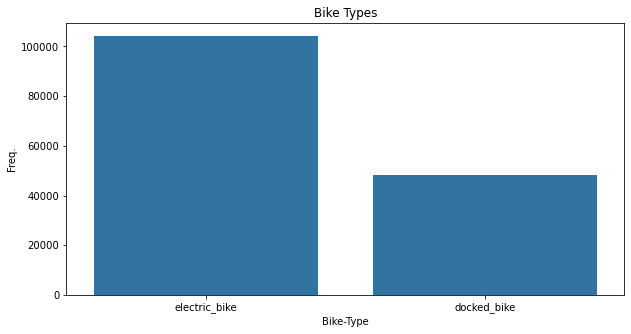

In [32]:
count_plot(data_clean , 'rideable_type', 'Bike-Type', 'Freq.', 'Bike Types')

the most used bike is electric bikes than docked bikes.

#### What is the hours the sytems used most ?

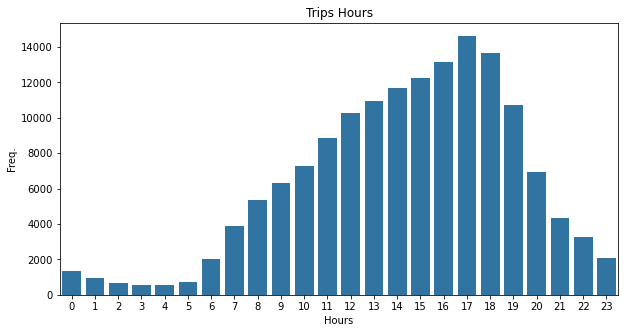

In [28]:
count_plot(data_clean ,'start_time_hour', 'Hours', 'Freq.', 'Trips Hours')

The system is used mainly around from 2-6 pm when people get to and get back from work.

#### What is the duration of most trips ?

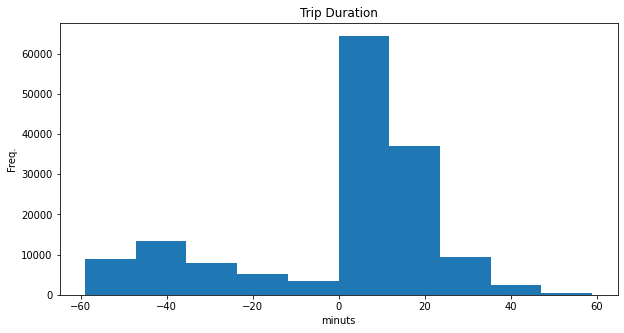

In [59]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,5])
plt.hist(data=data_clean , x='Duration_minuts',color=base_color);
plt.xlabel('minuts');
plt.ylabel('Freq.');
plt.title('Trip Duration');

Looking at the histogram, we can see that trip durations are no longer than 60 min and usually last 6 to 25 min.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was unusual points for the duration , which in some cases lasted more than 24h. For the histogram I set the max range to 60 minute

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> still nothing unusual until now

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [65]:
data_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour,start_time_minute,duration,Duration_minuts
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,...,-122.387456,casual,August,8,Fri,14,9,41,0 days 00:22:42,-38
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,...,-122.426539,casual,August,8,Thu,13,18,43,0 days 00:09:52,9
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,...,-122.398857,casual,August,8,Fri,14,9,13,0 days 00:06:35,7
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,...,-122.433821,casual,August,8,Fri,14,11,26,0 days 00:02:23,3
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,...,-122.490000,casual,August,8,Fri,14,8,37,0 days 00:14:43,15


In [67]:
data_clean.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [33]:
# make variables of customers and members
customer = data_clean.query('member_casual == "casual"')['ride_id'].count()
subscriber = data_clean.query('member_casual == "member"')['ride_id'].count()

customer_proportion = customer / data_clean['ride_id'].count()
subscriber_proportion = subscriber / data_clean['ride_id'].count()
customer_proportion

0.5939677000380462

#### what is the Percentage of customers and members ?

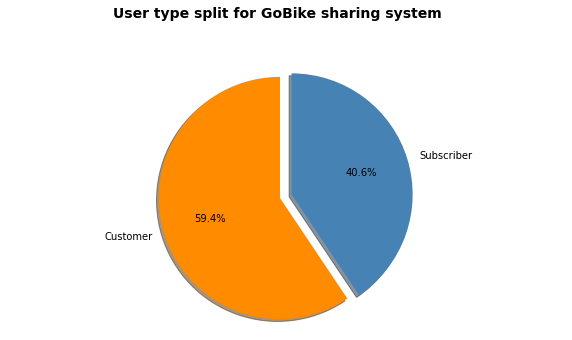

In [86]:
plt.figure(figsize = [10, 5])
labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers (59.4%) than ocassional riders (40.6%).


#### What is days the system used from customers and members ?

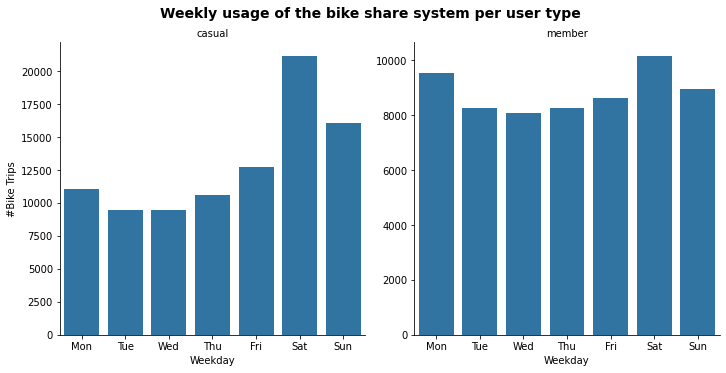

In [78]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=data_clean, x='start_time_weekday', col="member_casual", kind='count', sharey = False,
            color = base_color, order=weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week.

##### What is the hours the system used most from members and customers ?

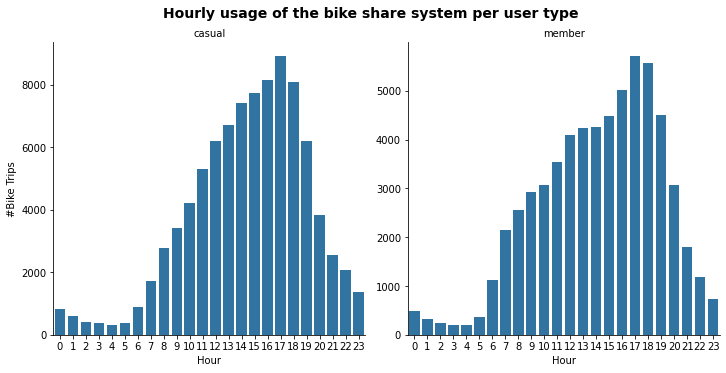

In [80]:
g = sb.catplot(data=data_clean, x='start_time_hour', col="member_casual", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

In the Hours of using system the customers and subscribers are mostly same in time witch it between 4-8. 

#### What is the duration of trips for each type of customers

C:\Users\oehab\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


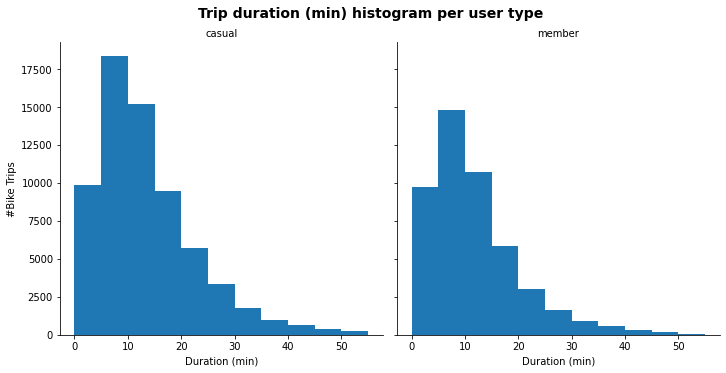

In [82]:
g = sb.FacetGrid(data_clean, col="member_casual", margin_titles=True, size=5)
bin_edges = np.arange(0, 60,5)
g.map(plt.hist, "Duration_minuts", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (min)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (min) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

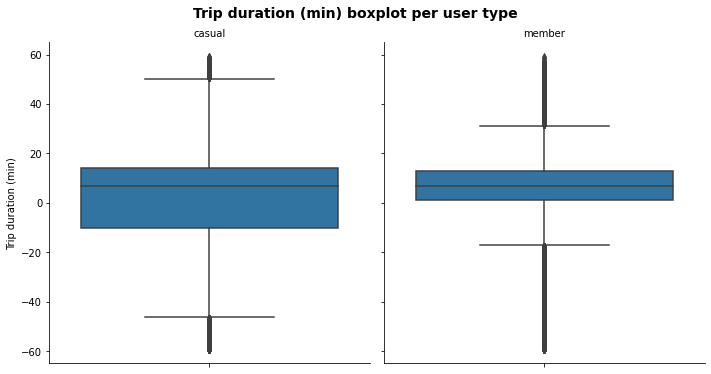

In [84]:

data = data_clean.query('Duration_minuts < 60')
g = sb.catplot(data=data, y='Duration_minuts', col="member_casual", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (min)")
g.fig.suptitle('Trip duration (min) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for casual than for members.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours . Subscribers are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [89]:
data_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour,start_time_minute,duration,Duration_minuts
0,6549E11C13124B5F,electric_bike,2020-08-14 09:41:03,2020-08-14 10:03:45,NaN,NaN,Illinois St at 20th St,376.0,37.790000,-122.420000,...,-122.387456,casual,August,8,Fri,14,9,41,0 days 00:22:42,-38
1,B7F273BF69C8E4A3,electric_bike,2020-08-13 18:43:00,2020-08-13 18:52:52,NaN,NaN,24th St at Chattanooga St,132.0,37.750000,-122.410000,...,-122.426539,casual,August,8,Thu,13,18,43,0 days 00:09:52,9
2,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,355.0,Jackson Playground,115.0,37.755426,-122.388588,...,-122.398857,casual,August,8,Fri,14,9,13,0 days 00:06:35,7
3,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,71.0,Pierce St at Haight St,73.0,37.773053,-122.439103,...,-122.433821,casual,August,8,Fri,14,11,26,0 days 00:02:23,3
4,B3BDECA79FF1C671,electric_bike,2020-08-14 08:37:37,2020-08-14 08:52:20,Broderick St at Oak St,71.0,NaN,NaN,37.773232,-122.439135,...,-122.490000,casual,August,8,Fri,14,8,37,0 days 00:14:43,15


##### the relation between weekdays, hours and type of customers 

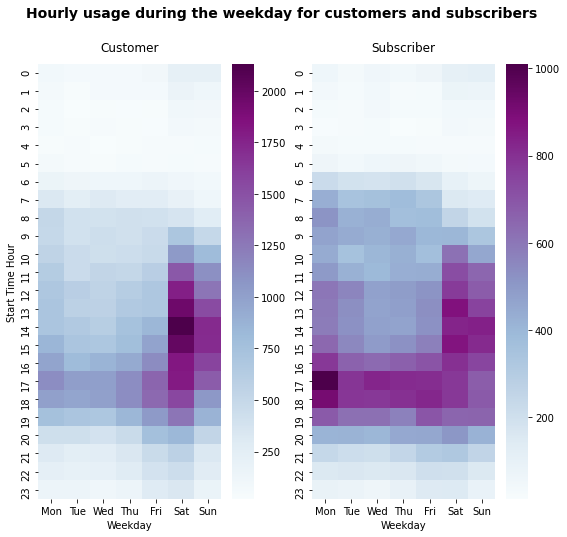

In [94]:
data_clean['start_time_weekday'] = pd.Categorical(data_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = data_clean.query('member_casual == "casual"').groupby(["start_time_hour", "start_time_weekday"])["ride_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "ride_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = data_clean.query('member_casual == "member"').groupby(["start_time_hour", "start_time_weekday"])["ride_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "ride_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

##### The plot perfectly summarizes in one place the diffrent trends for customers and subscribers I was writing up before.
###### Customers use the bike sharing system more often on weekends:
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
*weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm
###### Subscribers use the bike sharing system mainly on weekdays:
* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
*weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

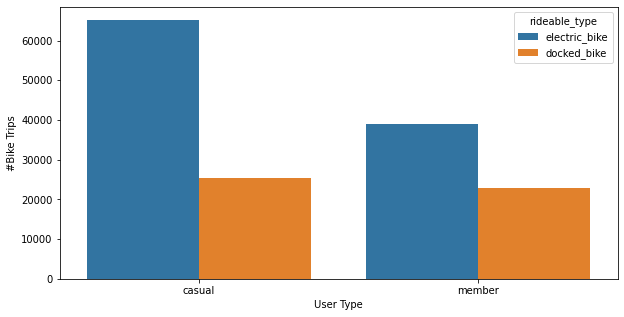

In [95]:
plt.figure(figsize = [10, 5])
g = sb.countplot(data=data_clean, x="member_casual", hue="rideable_type", order=data_clean.member_casual.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

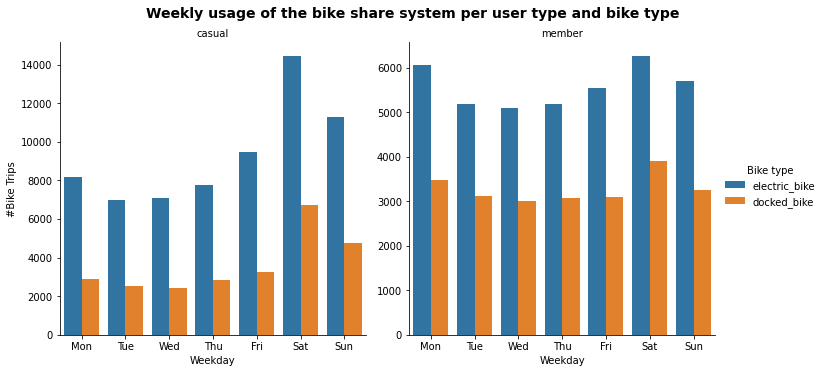

In [96]:

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=data_clean, x='start_time_weekday', col="member_casual", hue='rideable_type', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Bike type')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and bike type', y=1.03, fontsize=14, fontweight='semibold');

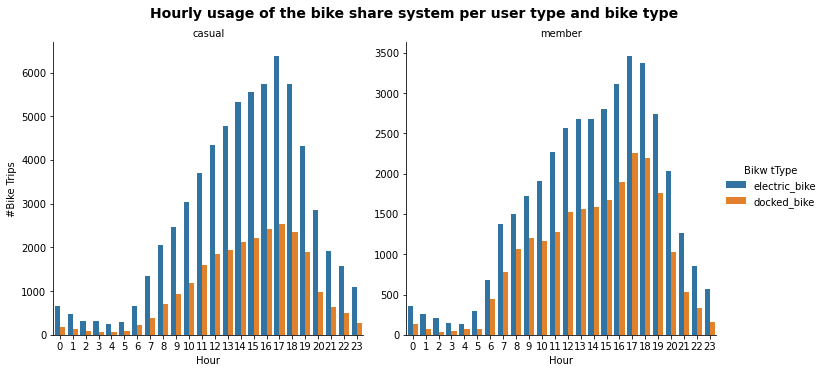

In [99]:
g = sb.catplot(data=data_clean, x='start_time_hour', col="member_casual", hue='rideable_type', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Bikw tType')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and bike type', y=1.03, fontsize=14, fontweight='semibold');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!